<a href="https://colab.research.google.com/github/ali-workshop/data_sential_part_I_using_machine_learning_algorithms_ML_Pipline/blob/main/data_sential_part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Abstract:

The impact of various machine learning algorithms, including Support Vector Machines (SVM), Logistic Regression (LR), XGBoost, Linear Discriminant Analysis (LDA), and Quadratic Discriminant Analysis (QDA),and other ML algorithms on the detection and prevention of credit card fraud is substantial and highly relevant in the context of financial security.
Credit card fraud poses a significant threat to both financial institutions and cardholders. To mitigate these risks, advanced machine learning algorithms have been instrumental in enhancing fraud detection systems.
Support Vector Machines (SVM) have proven effective in identifying fraudulent transactions by distinguishing unusual patterns from normal ones. SVMs excel at categorizing transactions into legitimate and suspicious, thereby helping financial institutions detect and respond to potential fraud promptly.
Logistic Regression (LR) offers a robust framework for modeling the likelihood of fraudulent activities based on historical transaction data. This algorithm assists in predicting the probability of fraud occurrence, allowing institutions to prioritize investigations and allocate resources more effectively.
XGBoost, a powerful ensemble learning algorithm, is well-suited for credit card fraud detection due to its exceptional predictive accuracy. By harnessing the collective wisdom of multiple decision trees, XGBoost can detect subtle anomalies and deviations from established spending patterns, minimizing false positives and ensuring that genuine transactions are not unnecessarily flagged.
Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) are invaluable for classifying credit card transactions into different risk categories. LDA is particularly useful when categorizing transactions into multiple risk levels, enabling institutions to tailor their responses to the severity of the threat. QDA excels in situations where non-linear relationships between variables are prevalent, providing a robust means to model complex fraud patterns.
In the context of credit card fraud, these machine learning algorithms have made a tangible impact by bolstering security measures, reducing financial losses, and enhancing the overall customer experience. Their ability to sift through vast volumes of transaction data, detect suspicious activities, and adapt to evolving fraud tactics has positioned them as critical tools in safeguarding financial assets and ensuring the integrity of credit card transactions. As financial institutions continue to leverage these algorithms, they are better equipped to stay one step ahead of fraudsters and protect the interests of both cardholders and the industry as a whole.

##download libraries

In [ ]:
!pip install opendatasets

# Imported Libraries

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.svm import SVC
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


#download data

In [ ]:
# {"username":"alolaa","key":"3005312b0970f031f097cc03c3ac0319"}
od.download(
    "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alolaa
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:03<00:00, 21.2MB/s]


#read data using pandas

In [ ]:
df = pd.read_csv('/content/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#explore the dataset

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#No Null Values
df.isnull().sum().max()

0

# The classes are(un balanced) we need to solve this issue later.

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


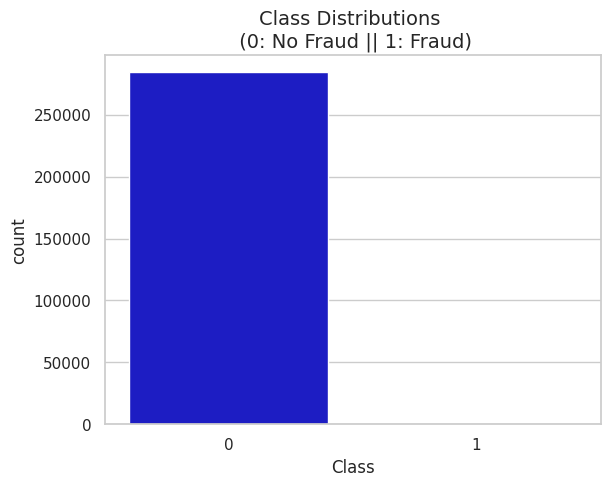

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.set(style="whitegrid")
sns.countplot(x='Class', data=df, palette=colors)

plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


#plot Distribution of Transaction Amount

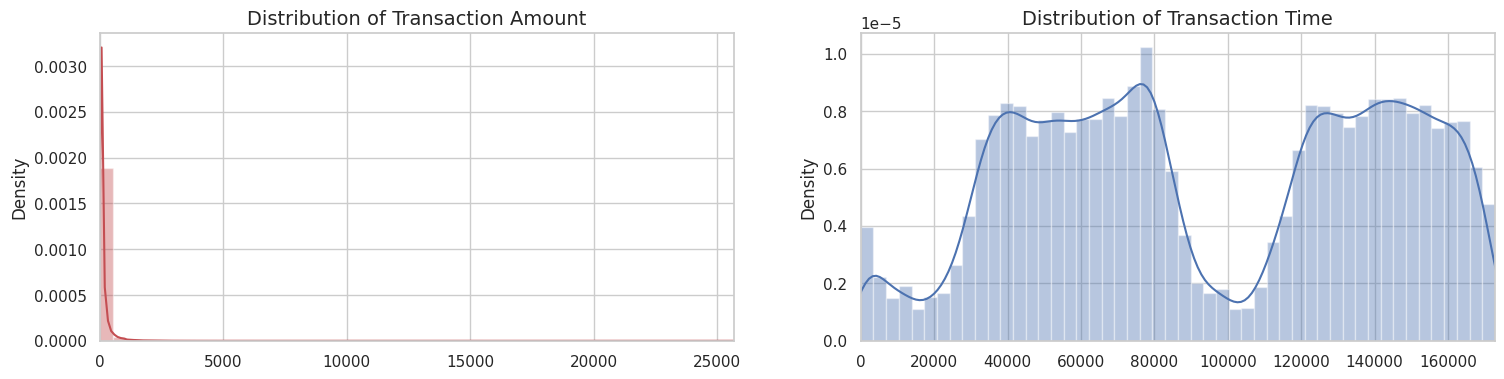

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

#  we should scale the columns that are left to scale (Amount and Time)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


# Turn into an array


In [ ]:

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]



#shuffle the data before building the subsamples

In [ ]:


df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
52384,-0.237546,-0.461389,-0.987742,0.410607,1.374888,-3.517239,0.995914,0.356167,1.134657,-0.668145,...,0.288532,-0.768751,-0.776771,-0.339125,-1.320963,0.022423,0.904974,-0.115935,-0.575155,0
154454,1.758821,0.198604,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,...,0.508985,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,1
139353,-0.294977,-0.018574,1.258151,0.371104,0.311112,0.690954,-0.354016,-1.069178,0.098485,-0.214425,...,-0.070405,-0.285950,-0.813841,0.127883,0.350530,0.222834,0.093861,-0.021660,0.031077,0
108258,-0.296793,-0.162878,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,...,0.646616,-1.328132,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,1
74794,4.051003,-0.339901,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,...,-4.128186,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,1


#plot the classes again, as the problem of balancing between fraud and no fraud is resolved

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


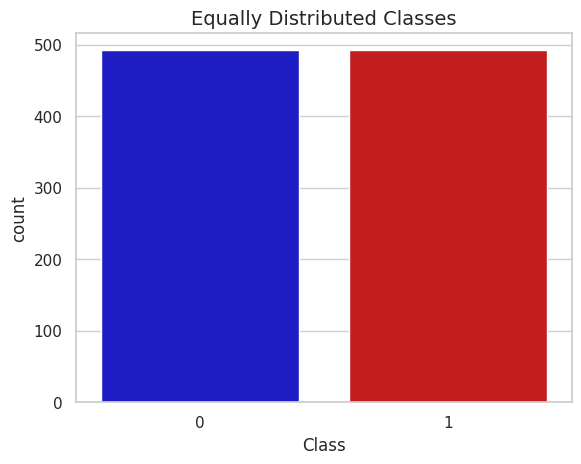

In [ ]:


colors = ["#0101DF", "#DF0101"]

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts() / len(new_df))

sns.set(style="whitegrid")  # Set the style of the plot

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


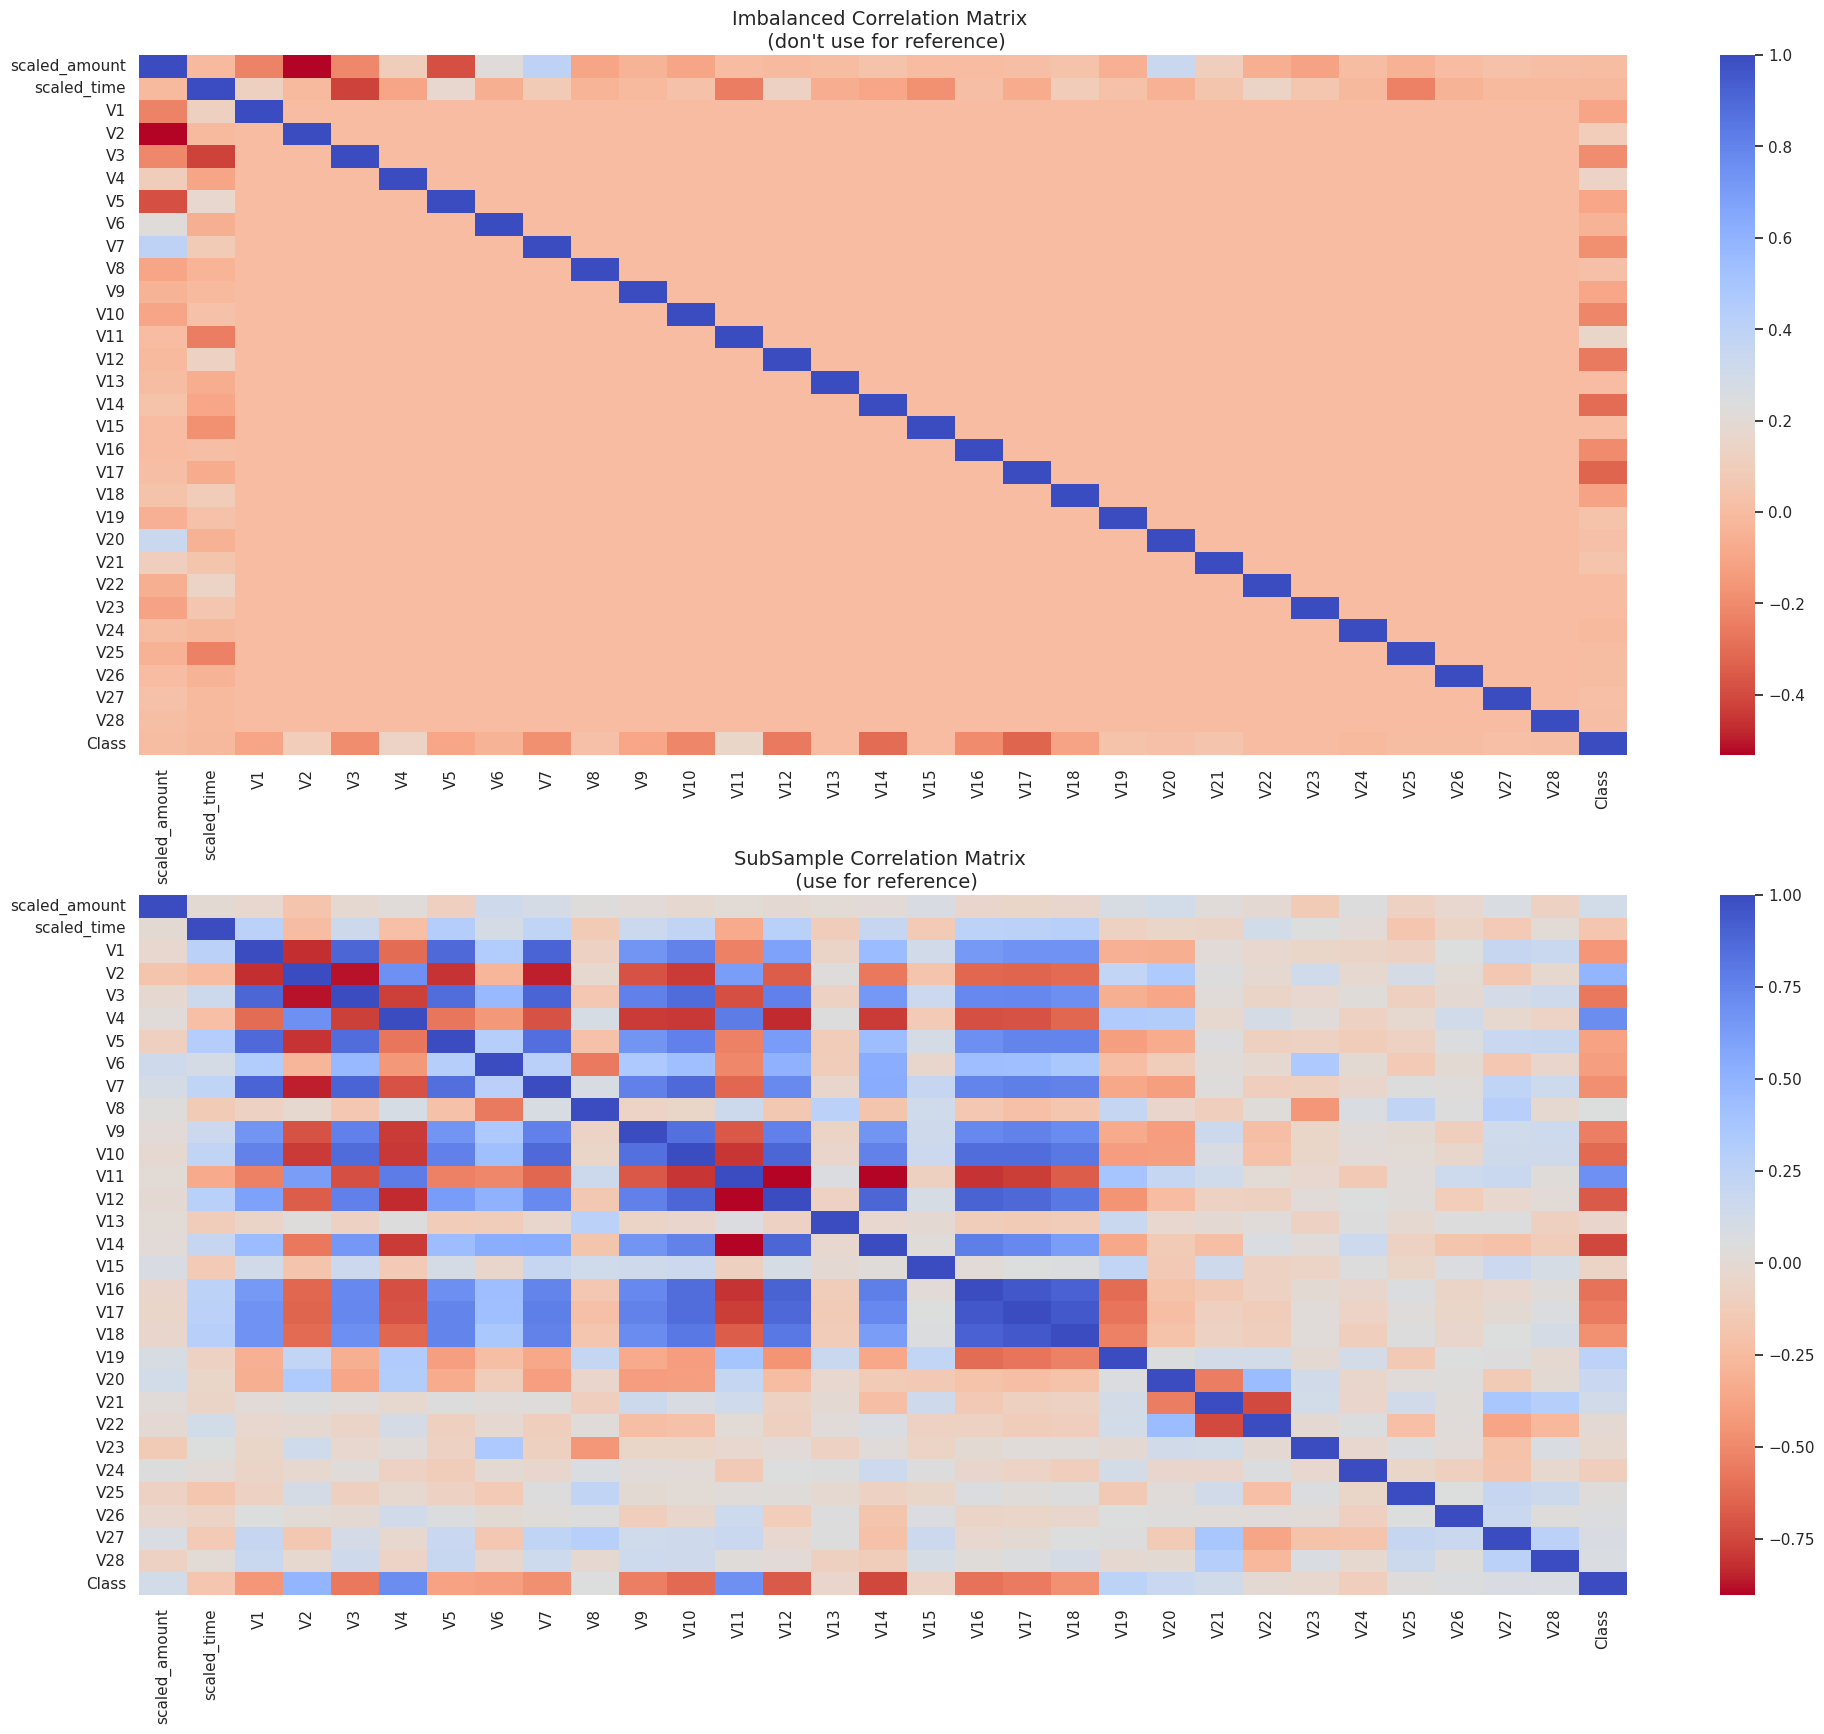

In [ ]:
#check for correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


# Undersampling before cross validating (prone to overfit)

In [ ]:

X = new_df.drop('Class', axis=1)
y = new_df['Class']

#split the data set into train,test and validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


# Turn the values into an array

In [ ]:

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
X_val=X_val.values
y_val=y_val.values

#implement  classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier


In [ ]:
#XGboost
xgb=XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Logistic Regression (LR)
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Linear Discriminant Analysis (LDA)
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

# Quadratic Discriminant Analysis (QDA)
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)


QuadraticDiscriminantAnalysis()

In [ ]:

# Step 3: Make predictions and evaluate classifiers
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

svm_accuracy, svm_report = evaluate_classifier(svm_classifier, X_test, y_test)
xgb_accuracy, xgb_report = evaluate_classifier(xgb, X_test, y_test)
lr_accuracy, lr_report = evaluate_classifier(lr_classifier, X_test, y_test)
rf_accuracy, rf_report = evaluate_classifier(rf_classifier, X_test, y_test)
lda_accuracy, lda_report = evaluate_classifier(lda_classifier, X_test, y_test)
qd_accuracy, qd_report = evaluate_classifier(qda_classifier, X_test, y_test)


In [ ]:

# Print the evaluation results for each classifier
print("SVM Accuracy:", svm_accuracy)
print("RF Accuracy:", rf_accuracy)
print("LDA Accuracy:", lda_accuracy)
print("qd Accuracy:", qd_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


SVM Accuracy: 0.9187817258883249
RF Accuracy: 0.9137055837563451
LDA Accuracy: 0.8883248730964467
qd Accuracy: 0.9035532994923858
XGBoost Accuracy: 0.9238578680203046
Logistic Regression Accuracy: 0.934010152284264



# Perform k-fold cross-validation for enhance accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
k =5
Classifiers=[qda_classifier,lda_classifier,svm_classifier,lr_classifier,rf_classifier]
for classifier in Classifiers:
  cross_val_scores = cross_val_score(lr_classifier, X_train, y_train, cv=k, scoring='accuracy')
  # Calculate and print the mean and standard deviation of the accuracy scores
  mean_accuracy = np.mean(cross_val_scores)
  std_accuracy = np.std(cross_val_scores)
  print(f"Mean Accuracy for {classifier}: {mean_accuracy:.4f}")
  print(f"Standard Deviation for {classifier}: {std_accuracy:.4f}")


Mean Accuracy for QuadraticDiscriminantAnalysis(): 0.9492
Standard Deviation for QuadraticDiscriminantAnalysis(): 0.0221
Mean Accuracy for LinearDiscriminantAnalysis(): 0.9492
Standard Deviation for LinearDiscriminantAnalysis(): 0.0221
Mean Accuracy for SVC(): 0.9492
Standard Deviation for SVC(): 0.0221
Mean Accuracy for LogisticRegression(): 0.9492
Standard Deviation for LogisticRegression(): 0.0221
Mean Accuracy for RandomForestClassifier(): 0.9492
Standard Deviation for RandomForestClassifier(): 0.0221
